## Major Project COMP8240

### Default Project - Group J

### Author: Sadia Tasnim (45760179)

###  fastText library exploration 

The objective of this project is to explore the facebook machine learning library called fastText which is doing a phenomenal job in word labelling and representation. This particular machine learning library can be applied to the purpose of text classification which is a necessity in case of sentiment analysis, business analysis (such as - product reviews, customer satisfaction percentage), as well as political situation analysis. In this project we will show our work in two steps - 
1. Replication of original work
2. Applying fasttext model in new dataset and comparison with the original work


The purpose is to show how the library can be used in supervised machine learning and even be tuned to be fast and more accurate.

Twitter data sources
1. http://cucis.ece.northwestern.edu/projects/Social/sentiment_data.html
2. http://help.sentiment140.com/for-students

## Loading the necessary libraries

In [1]:
import pandas as pd
import numpy as np

## Data Preprocessing

The Twitter dataset from the above mentioned first link have two separate files for twitter data and labels.The purpose is to combine those the two text files so that the labels for each tweet can be viewed in one line and the model setup in fasttext can be completed. 

I have taken the second dataset to enrich the volume and variety of the dataset as the first dataset had only 500 tweets. 

In [2]:
#This code will combine the tweets and the labels of the first data source
combine =[]

with open("tweets_data.txt") as xh:
    with open('tweets_label.txt') as yh:
        with open("tweetsShort.txt","w") as zh:
      #Read first file
          xlines = xh.readlines()
      #Read second file
          ylines = yh.readlines()
      #Combine content of both lists
      #combine = list(zip(ylines,xlines))
      #Write to third file
          for i in range(len(xlines)):
            line = "__label__"+ ylines[i].strip() + ' ' + xlines[i]
            zh.write(line)

In [3]:
#This code will read tweets from the second dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
tweet_long_df = pd.read_csv('trainingandtestdata/tweetTraining.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
tweet_long_df.sample(5)

,target,ids,date,flag,user,text
1029879,4,1932844434,Tue May 26 22:21:12 PDT 2009,NO_QUERY,morgancorin,Sleep...who needs it?!? At least I'll have a c...
111585,0,1825172728,Sun May 17 04:39:35 PDT 2009,NO_QUERY,Jovanny987,Wasent On 4 Some Time Cuz I Was qrounded
486161,0,2181412693,Mon Jun 15 11:47:42 PDT 2009,NO_QUERY,ewabradley,is a little lost today...
1474408,4,2065731319,Sun Jun 07 09:10:49 PDT 2009,NO_QUERY,Nattington,so pleased Roger did it
1200171,4,1985453394,Sun May 31 17:07:55 PDT 2009,NO_QUERY,BethHeinbeck,Excited to watch the VMA's and see Kings of Le...


In [4]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
tweet_df = pd.read_csv('trainingandtestdata/tweetTraining.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
tweet_df.sample(5)

,target,ids,date,flag,user,text
1188305,4,1983310328,Sun May 31 12:54:45 PDT 2009,NO_QUERY,alixfersure,Its to early. So I'm gonna try go back to sleep
1433502,4,2060455872,Sat Jun 06 18:56:25 PDT 2009,NO_QUERY,Joey_P_Golf,@TheChristinaKim give me a month or two to get...
1071103,4,1966268307,Fri May 29 17:26:53 PDT 2009,NO_QUERY,ashleyepsen,"#blackkeys, #muchbetter &amp; #heybaby are my ..."
411907,0,2060223185,Sat Jun 06 18:29:50 PDT 2009,NO_QUERY,charlotte3107,@R1OTboy o.O whatt? explain??? iloveyuophilly...
525090,0,2193746724,Tue Jun 16 08:52:33 PDT 2009,NO_QUERY,tylermasid,I wish I don't want to audits!!!


In [5]:
tweet_df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
tweet_df.loc[(tweet_df.target == 0), 'target'] = 'Negative'
tweet_df.loc[(tweet_df.target == 2), 'target'] = 'Neutral'
tweet_df.loc[(tweet_df.target == 4), 'target'] = 'Positive'

<AxesSubplot:>

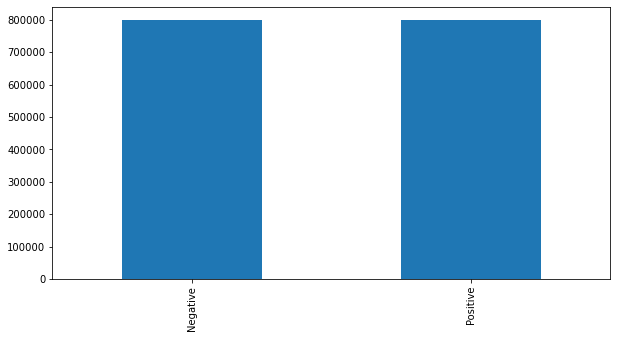

In [7]:
tweet_df['target'].value_counts().sort_index().plot(kind = 'bar', figsize = (10, 5))

In [8]:
# Creating a new dataframe with only the tweets 
tweet_long_df_new = tweet_long_df.filter(['text'], axis=1)

In [9]:
# printing the dataframe
tweet_long_df_new.head()

,text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,is upset that he can't update his Facebook by ...
2,@Kenichan I dived many times for the ball. Man...
3,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all...."


In [10]:
# Saving the tweets (every tweet in a new line) in a text file
tweet_long_df_new.to_csv('longTweet.txt', sep='\n', index=False)

In [11]:
# Creating a new dataframe with only the labels
tweet_long_df_new_label = tweet_long_df.filter(['target'], axis=1)

According to the dataset description, the polarity of the tweets are saved in numeric form. 0 = negative, 2 = neutral, 4 = positive. However, the dataset from link 1 saves the polarity as such- N = negative, O = neutral, P = positive. To make the datasets of the same format, I am changing the polarity of the second dataset according to the first dataset format.

In [12]:
tweet_long_df_new_label.loc[(tweet_long_df_new_label.target == 0), 'target'] = 'N'

In [13]:
tweet_long_df_new_label.loc[(tweet_long_df_new_label.target == 2), 'target'] = 'O'

In [14]:
tweet_long_df_new_label.loc[(tweet_long_df_new_label.target == 4), 'target'] = 'P'

In [15]:
tweet_long_df_new_label

,target
0,N
1,N
2,N
3,N
4,N
...,...
1599995,P
1599996,P
1599997,P
1599998,P


In [16]:
# Saving the label tweets (every tweet in a new line) in a text file
tweet_long_df_new_label.to_csv('twitterLabelBig.txt', sep='\n', index=False)

Next step is to merge the tweets from the different datasets

In [17]:
# Python program to merge two files 
dataTweet = dataTweet2 = "" 
  
# Reading data from first file 
with open('tweets_data.txt', errors='ignore') as fp: 
    dataTweet = fp.read() 
    with open('longTweet.txt', errors='ignore') as fp: 
        dataTweet2 = fp.read() 
# Merging two files into one another file 
dataTweet += "\n"
dataTweet += dataTweet2 
with open ('totalTweet.txt', 'w') as fp: 
    fp.write(dataTweet)
# Python program to
# demonstrate merging
# of two files




Now merging the labels from the two datasets

In [25]:
# Python program to merge two files 
dataTweet = dataTweet2 = "" 
  
# Reading data from first file 
with open('tweets_label.txt', errors='ignore') as fp: 
    dataTweet = fp.read() 
    with open('twitterLabelBig.txt', errors='ignore') as fp: 
        dataTweet2 = fp.read() 
# Merging two files into one another file 
dataTweet += "\n"
dataTweet += dataTweet2 
with open ('totalLabel.txt', 'w') as fp: 
    fp.write(dataTweet)

The following step combines the tweets with their polarity value. The prefix "__label__" is necessary for the fasttext format

In [41]:
combine =[]

with open("totalTweet.txt") as xh:
    with open('totalLabel.txt') as yh:
        with open("totalLabelledTweet.txt","w") as zh:
      #Read first file
          xlines = xh.readlines()
      #Read second file
          ylines = yh.readlines()
      #Combine content of both lists
      #combine = list(zip(ylines,xlines))
      #Write to third file
          for i in range(len(xlines)):
            line = "__label__"+ ylines[i].strip() + ' ' + xlines[i]
            zh.write(line)

The command line code "wc totalLabelledTweet.txt" will give us the result of the word counts, line counts information which is in my case is 1600500 (line count or in this case number of tweets)

The next step is to divide the datasets into train and test sets. I have created tweet.train and tweet.valid sets for training and testing purpose respectively.

In [42]:
# importing fasttext library
import fasttext

train_supervised() will mostly be used for retruning a model object and calling test and predict on that object. This is the same as learning the text classifier.

In [43]:
model = fasttext.train_supervised(input="tweet.train")

The input argument indicates the file containing the training examples. We can now use the model variable to access information on the trained model.

We can also call save_model to save it as a file and load it later with load_model function.
<br>source: https://fasttext.cc/docs/en/supervised-tutorial.html 

In [44]:
model.save_model("model_tweet.bin")

For testing the classifier, model.predict() is used.

In [45]:
model.predict("Because I'm happy")

(('__label__N',), array([0.79193991]))

As happy is a positive word, it is labelled as P

In [46]:
model.predict("Which baking dish is best to bake a banana bread ?")

(('__label__P',), array([0.6295979]))

The word "best" is a positive word

In [47]:
model.predict("I am sad")

(('__label__N',), array([1.00001001]))

Smilarly "sad" is a word discribing negative emotion 

Next step is to test the model's quality on the test set

In [48]:
model.test("tweet.valid")

(480500, 0.17850780437044744, 0.17850780437044744)

The output are the number of samples (here 480500), the precision at one (0.643) and the recall at one (0.643).

In [49]:
model.test("tweet.valid", k=5)

(480500, 0.3333333333333333, 1.0)

The precision at 5 is 0.333 and recall is 1

As we know that, precision discloses the number of correct labels among the labels predicted by fastText and the recall score is the number of successfully predicted labels among all the real ones.

In [50]:
model.predict("Because I'm happy", k=5)

(('__label__N', '__label__P', '__label__O'),
 array([7.91939914e-01, 2.08080098e-01, 1.00023208e-05]))

## Model Betterment

A crude normalization can be obtained using the command line tools such as sed and tr and by using that, I removed the uppercase and punctuation marks.

After preprocessing, I tried to train the new model on that data

In [51]:
model_preprocssed = fasttext.train_supervised(input="tweetL.train")

In [52]:
model_preprocssed.test("tweetL.valid")

(480500, 0.6859001040582726, 0.6859001040582726)

###  Model betterment through increased epoch

In [53]:
model_hyperparameter_tuned_epochs = fasttext.train_supervised(input="tweetL.train", epoch=50)

In [54]:
model_hyperparameter_tuned_epochs.test("tweetL.valid")

(480500, 0.02251196670135276, 0.02251196670135276)

After increasing the number of epochs the model became quite strong. By setting up the epoch option, I increased the number of times each example is seen from default value 5 to 50. 

### Setting up larger learning rate

In [55]:
model_hyperparameter_tuned_lr = fasttext.train_supervised(input="tweetL.train", lr=1.0)

In [56]:
model_hyperparameter_tuned_lr.test("tweetL.valid")

(480500, 0.05064724245577523, 0.05064724245577523)

precision and recall score gets a bit down from the scores of increased epoch ( around 19%)

In [57]:
model_hyperparameter_tuned_lr1 = fasttext.train_supervised(input="tweetL.train", lr=0.5)

In [58]:
model_hyperparameter_tuned_lr1.test("tweetL.valid")

(480500, 0.6238834547346515, 0.6238834547346515)

As we know the range of lr is from 0.1 to 1.0. By applying lr=0.5, I could see that the scores decreased

### Applying learing rate and increased epoch

In [59]:
model_hyperparameter_tuned = fasttext.train_supervised(input="tweetL.train", lr=1.0, epoch=25)

In [60]:
model_hyperparameter_tuned.test("tweetL.valid")

(480500, 0.6116024973985432, 0.6116024973985432)

## Word n-grams

In case of sentiment analysis, using bigrams can be beneficial as word order can effect the accuracy of sentiment analysis. For example, In the sentence- "I am not good at accounting." has the word "good" in it, it might be declared as positive but, using bigrams can be useful here as the word order "not good" will be taken into account and deemed as negative. 

In [61]:
model_bigram = fasttext.train_supervised(input="tweetL.train", lr=1.0, epoch=25, wordNgrams=2)

In [62]:
model_bigram.test("tweetL.valid")

(480500, 0.7501394380853278, 0.7501394380853278)

## Hierarchical softmax

A potential solution for faster training is to use hierarchical softmax instead of the regular softmax. This can be utilised with the option -loss hs :

In [63]:
model_hisoftmax = fasttext.train_supervised(input="tweetL.train", lr=1.0, epoch=25, wordNgrams=2, bucket=200000, dim=50, loss='hs') 

In [64]:
model_hisoftmax.test("tweetL.valid")

(480500, 0.631735691987513, 0.631735691987513)

The increase rate in precision from bigram to Hierarchical softmax is 22.06% 

The hierarchical softmax is a loss function that approximates the softmax with a much faster computation.

The idea is to build a binary tree whose leaves correspond to the labels. Each intermediate node has a binary decision activation (e.g. sigmoid) that is trained, and predicts if we should go to the left or to the right. The probability of the output unit is then given by the product of the probabilities of intermediate nodes along the path from the root to the output unit leave.

For a detailed explanation, you can have a look on this video.

In fastText, we use a Huffman tree, so that the lookup time is faster for more frequent outputs and thus the average lookup time for the output is optimal.
<br>
Data Source: https://fasttext.cc/docs/en/supervised-tutorial.html

## Multi-label classification

This step is beneficial when we want to assign multiple labels to the document. When we use independent binary classifiers for each label, it creates a convenient environment to handle multple labels. 

In [65]:
model_multiClass= fasttext.train_supervised(input="tweetL.train", lr=0.5, epoch=25, wordNgrams=2, bucket=200000, dim=50, loss='ova')

In [66]:
model_multiClass.predict("because I'm not happy", k=-1, threshold = 0.5)

(('__label__n',), array([1.00001001]))

In [67]:
model_multiClass.test("tweetL.valid", k=-1)

(480500, 0.3333333333333333, 1.0)

Now it shows that we are getting recall score 1.0 